In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


### This notebook contains only the analysis of measured roughness at CB and Eureka 22

import processed roughness parameter from mulitple site. The 3d point cloud are used to calculate roughness parameters.

In [3]:
#add your data AKROSS path

df_CB = pd.read_csv('smrt_in-out/AK_rough_param_detrend.csv')
index_snow = df_CB[['snow' in file for file in df_CB.file]].index
index_rough = df_CB[df_CB.rms >= 0.01].index
df_CB['type'] = 'ice (flat)'
df_CB.loc[index_rough,'type'] = 'ice (rough)'
df_CB.loc[index_snow,'type'] = 'snow'



df_E22 = pd.read_csv('smrt_in-out/E22_rough_param_detrend.csv')
index_snow = df_E22[['snow' in file for file in df_E22.file]].index
df_E22['type'] = 'ice (flat)'
df_E22.loc[index_snow,'type'] = 'snow'

#remove pressure ridge from CB
df_all = pd.concat([df_CB[2:],df_E22], ignore_index=True)

Classify into snow, flat and rough ice

In [4]:
#rough ice
mean_ice_rough_rms = df_all[df_all.type == 'ice (rough)'].rms.mean()
std_ice_rough_rms = df_all[df_all.type == 'ice (rough)'].rms.std()
mean_ice_rough_lc = df_all[df_all.type == 'ice (rough)'].lcorr.mean()
std_ice_rough_lc = df_all[df_all.type == 'ice (rough)'].lcorr.std()

#flat ice
mean_ice_flat_rms = df_all[df_all.type == 'ice (flat)'].rms.mean()
std_ice_flat_rms = df_all[df_all.type == 'ice (flat)'].rms.std()
mean_ice_flat_lc = df_all[df_all.type == 'ice (flat)'].lcorr.mean()
std_ice_flat_lc = df_all[df_all.type == 'ice (flat)'].lcorr.std()

#snow
mean_snow_rms = df_all[df_all.type == 'snow'].rms.mean()
std_snow_rms = df_all[df_all.type == 'snow'].rms.std()
mean_snow_lc = df_all[df_all.type == 'snow'].lcorr.mean()
std_snow_lc = df_all[df_all.type == 'snow'].lcorr.std()

print(f'mean ice rms {mean_ice_rough_rms} ± {std_ice_rough_rms/2}, mean lc : {mean_ice_rough_lc} ± {std_ice_rough_lc/2}')
print(f'mean flat ice rms {mean_ice_flat_rms} ± {std_ice_flat_rms/2}, mean flat ice lc : {mean_ice_flat_lc} ± {std_ice_flat_lc/2}')
print(f'mean snow rms {mean_snow_rms} ± {std_snow_rms/2}, mean snow lc : {mean_snow_lc} ± {std_snow_lc/2}')


mean ice rms 0.021040338 ± 0.001323392158021763, mean lc : 0.1296404920241578 ± 0.0137405673339545
mean flat ice rms 0.00140006697 ± 0.0005794469000807126, mean flat ice lc : 0.04693863735535733 ± 0.009879649487015278
mean snow rms 0.003864258227272727 ± 0.0009878082588309774, mean snow lc : 0.16288922701895397 ± 0.03474758911220302


In [31]:
df_all

,file,rms,lcorr,NbPoints,type
0,AK1_seaice1_rough_clip.ply,0.017950,0.134808,187235.95,ice (rough)
1,AK1_seaice2_flat_clip.ply,0.004022,0.088106,162178.45,ice (flat)
2,AK1_snow1_clip.ply,0.004546,0.159327,47064.20,snow
3,AK1_snow2_clip.ply,0.003874,0.190501,25906.85,snow
4,AK1_snow3_clip.ply,0.007735,0.189229,32951.30,snow
5,AK2_seaice1_clip.ply,0.000554,0.031038,64153.70,ice (flat)
6,AK2_seaice2_clip.ply,0.000604,0.045062,63714.35,ice (flat)
7,AK2_snow1_clip.ply,0.003607,0.111445,67123.15,snow
8,AK2_snow2_clip.ply,0.004367,0.145001,75343.60,snow
9,AK3_seaice1_clip.ply,0.024420,0.166466,68096.15,ice (rough)


Plot data using seaborn

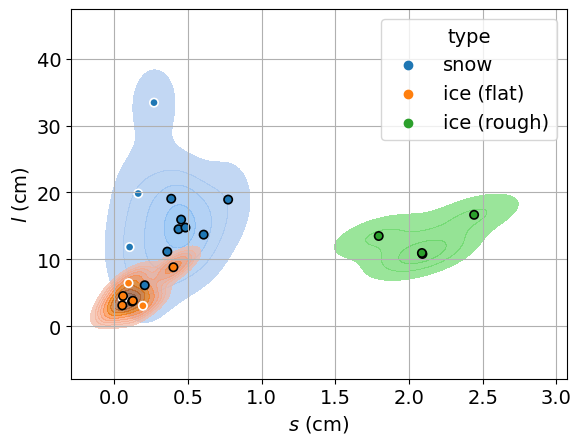

In [38]:

plt.rcParams.update({'font.size': 14})

sns.kdeplot(x = df_all.rms *100, y = df_all.lcorr*100, hue = df_all.type, alpha = 0.7, fill = True, hue_order = ['snow', 'ice (flat)', 'ice (rough)'])
sns.scatterplot(x = df_all.rms *100, y = df_all.lcorr*100, hue = df_all.type, hue_order = ['snow', 'ice (flat)', 'ice (rough)'])

sns.scatterplot(x = df_E22.rms *100, y = df_E22.lcorr*100, hue = df_E22.type, hue_order = ['snow', 'ice (flat)', 'ice (rough)'], legend = False, linewidth=1.2)
sns.scatterplot(x = df_CB[2:].rms *100, y = df_CB[2:].lcorr*100, hue = df_CB.type, hue_order = ['snow', 'ice (flat)', 'ice (rough)'], legend = False, edgecolor = 'k', linewidth=1.2)
#plt.scatter(df_CB.rms*100, df_CB.lcorr*100, color = 'k')
plt.xlabel('$s$ (cm)')
plt.ylabel('$l$ (cm)')
plt.grid()
plt.savefig('C://Users/melochej/OneDrive - EC-EC/Documents/post-doc/AKROSS/article/fig_output/kdeplot_roughness.png', dpi=300, format='png', bbox_inches='tight')